# The task of clustering buyers in order to further plan marketing campaigns for each group of buyers

## EDA of dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

customers_data = pd.read_csv('14.4 marketing campaign.csv')
customers_data.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [2]:
customers_data.info()
#there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Dt_Customer        2240 non-null   object
 3   Recency            2240 non-null   int64 
 4   MntFruits          2240 non-null   int64 
 5   MntMeatProducts    2240 non-null   int64 
 6   MntFishProducts    2240 non-null   int64 
 7   MntSweetProducts   2240 non-null   int64 
 8   NumWebPurchases    2240 non-null   int64 
 9   NumStorePurchases  2240 non-null   int64 
 10  Response           2240 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 192.6+ KB


In [3]:
customers_data.pop('ID')

0        5524
1        2174
2        4141
3        6182
4        5324
        ...  
2235    10870
2236     4001
2237     7270
2238     8235
2239     9405
Name: ID, Length: 2240, dtype: int64

In [4]:
customers_data.describe()

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,49.109375,26.302232,166.950000,37.525446,27.062946,4.084821,5.790179,0.149107
std,11.984069,28.962453,39.773434,225.715373,54.628979,41.280498,2.778714,3.250958,0.356274
min,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,24.000000,1.000000,16.000000,3.000000,1.000000,2.000000,3.000000,0.000000
50%,1970.000000,49.000000,8.000000,67.000000,12.000000,8.000000,4.000000,5.000000,0.000000
75%,1977.000000,74.000000,33.000000,232.000000,50.000000,33.000000,6.000000,8.000000,0.000000
max,1996.000000,99.000000,199.000000,1725.000000,259.000000,263.000000,27.000000,13.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x16c0f7790>,
 'caps': [<matplotlib.lines.Line2D at 0x16c10d1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16be11a90>],
 'medians': [<matplotlib.lines.Line2D at 0x16c10ea50>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c10f510>],
 'means': []}

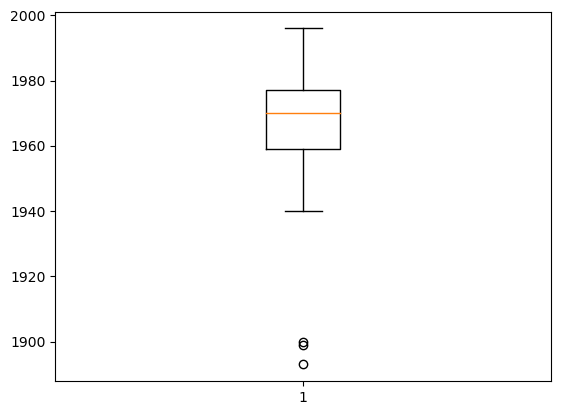

In [5]:
#outliers and anomalies
plt.boxplot(customers_data['Year_Birth'])
#birth years close to the year 1900 are abnormal

In [6]:
customers_data

,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,1957,04-09-2012,58,88,546,172,88,8,4,1
1,1954,08-03-2014,38,1,6,2,1,1,2,0
2,1965,21-08-2013,26,49,127,111,21,8,10,0
3,1984,10-02-2014,26,4,20,10,3,2,4,0
4,1981,19-01-2014,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...
2235,1967,13-06-2013,46,43,182,42,118,9,4,0
2236,1946,10-06-2014,56,0,30,0,0,8,5,0
2237,1981,25-01-2014,91,48,217,32,12,2,13,0
2238,1956,24-01-2014,8,30,214,80,30,6,10,0


In [7]:
customers_data[['Day','Month', 'Reg_year']] = customers_data['Dt_Customer'].str.split('-', expand=True)
customers_data.pop('Day')
customers_data.pop('Month')
customers_data.pop('Dt_Customer')


0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [8]:
customers_data['Age'] = 2023 -  customers_data['Year_Birth']

In [9]:
customers_data.pop('Year_Birth')

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [10]:
cols= ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
customers_data['sum_mnt_cost'] = customers_data[cols].sum (axis= 1 )
customers_data

,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Reg_year,Age,sum_mnt_cost
0,58,88,546,172,88,8,4,1,2012,66,894
1,38,1,6,2,1,1,2,0,2014,69,10
2,26,49,127,111,21,8,10,0,2013,58,308
3,26,4,20,10,3,2,4,0,2014,39,37
4,94,43,118,46,27,5,6,0,2014,42,234
...,...,...,...,...,...,...,...,...,...,...,...
2235,46,43,182,42,118,9,4,0,2013,56,385
2236,56,0,30,0,0,8,5,0,2014,77,30
2237,91,48,217,32,12,2,13,0,2014,42,309
2238,8,30,214,80,30,6,10,0,2014,67,354


In [11]:
first_age_category = customers_data[customers_data['Age'] < 40]
second_age_category =customers_data.loc[((customers_data['Age'] >=40) & (customers_data['Age'] <= 60))]
third_age_category = customers_data[customers_data['Age'] > 60]

In [12]:
first_age_category['Age_category'] = '<40'
second_age_category['Age_category'] = 'between 40 and 60'
third_age_category['Age_category'] = '>60'

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4573/2708213230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_age_category['Age_category'] = '<40'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4573/2708213230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_age_category['Age_category'] = 'between 40 and 60'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4573/2708213230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [13]:
new_data = pd.concat([first_age_category,second_age_category])
category_data = pd.concat([new_data,third_age_category])
category_data

,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Reg_year,Age,sum_mnt_cost,Age_category
3,26,4,20,10,3,2,4,0,2014,39,37,<40
7,32,10,56,3,1,4,4,0,2013,38,70,<40
14,38,14,17,6,1,1,3,0,2012,36,38,<40
19,86,17,19,30,24,2,3,0,2012,38,90,<40
27,19,1,3,3,263,27,0,0,2013,37,270,<40
...,...,...,...,...,...,...,...,...,...,...,...,...
2217,54,194,377,149,125,4,7,0,2014,75,845,>60
2227,39,7,137,4,0,4,8,0,2013,61,148,>60
2236,56,0,30,0,0,8,5,0,2014,77,30,>60
2238,8,30,214,80,30,6,10,0,2014,67,354,>60


(array([ 22., 223., 490., 535., 178., 143., 255., 125.,  81., 188.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

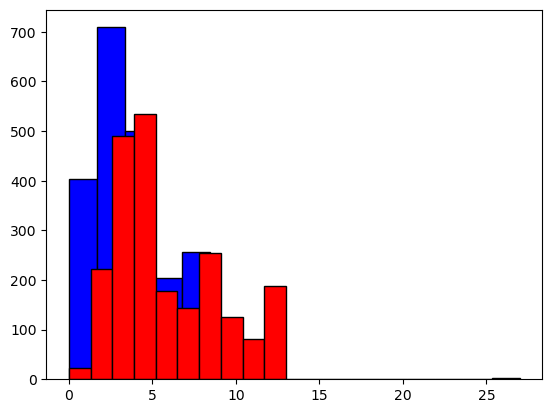

In [14]:
plt.hist(customers_data['NumWebPurchases'], color = 'blue', edgecolor = 'black',
         bins = int(16))
plt.hist(customers_data['NumStorePurchases'], color = 'red', edgecolor = 'black',
         bins = int(10))
#customers tend to shop through an online store

(array([ 10.,  33.,  77., 101., 125., 131., 218., 152., 240., 199., 168.,
        131., 136., 151.,  99., 130.,  80.,  40.,  14.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   1.]),
 array([ 27.        ,  29.86111111,  32.72222222,  35.58333333,
         38.44444444,  41.30555556,  44.16666667,  47.02777778,
         49.88888889,  52.75      ,  55.61111111,  58.47222222,
         61.33333333,  64.19444444,  67.05555556,  69.91666667,
         72.77777778,  75.63888889,  78.5       ,  81.36111111,
         84.22222222,  87.08333333,  89.94444444,  92.80555556,
         95.66666667,  98.52777778, 101.38888889, 104.25      ,
        107.11111111, 109.97222222, 112.83333333, 115.69444444,
        118.55555556, 121.41666667, 124.27777778, 127.13888889,
        130.        ]),
 <BarContainer object of 36 artists>)

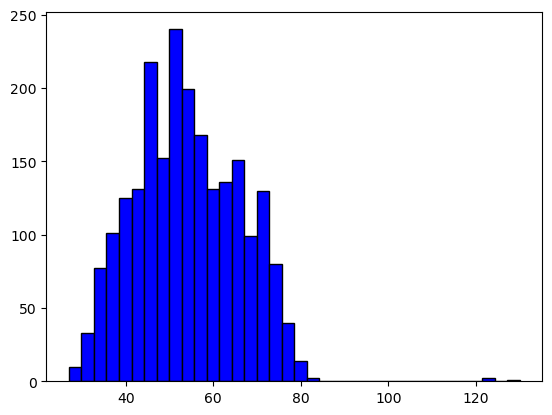

In [15]:
plt.hist(customers_data['Age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

### Trying to divide customers by age depending on purchases in an online store.

In [16]:
import numpy as np

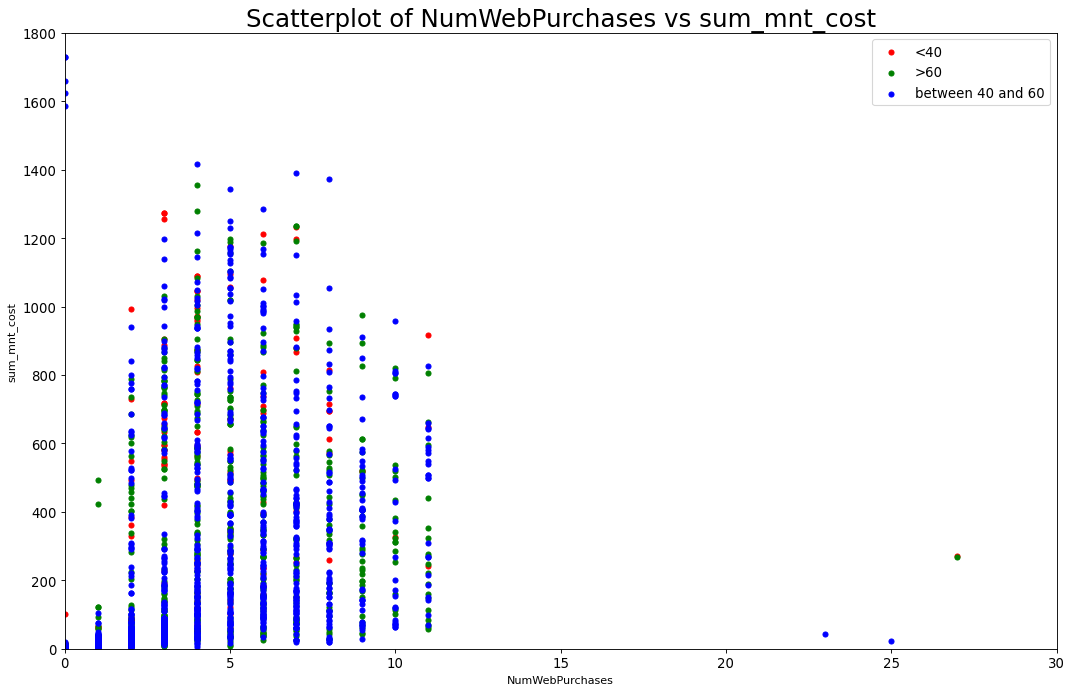

In [17]:
categories = np.unique(category_data['Age_category'])
colors = ['red', 'green', 'blue']

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('NumWebPurchases', 'sum_mnt_cost', 
                data=category_data.loc[category_data.Age_category==category, :], 
                s=20, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 30), ylim=(0, 1800),
              xlabel='NumWebPurchases', ylabel='sum_mnt_cost')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of NumWebPurchases vs sum_mnt_cost", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  


#there is such a connection: the more often customers place orders in online stores, the lower their average spending
# for goods, or they always buy something at the same price, whereas others can buy something very expensive and
#average cost. Some people who are over 60 years old are prone to frequent purchases, but not too expensive, and others to infrequent, but expensive.


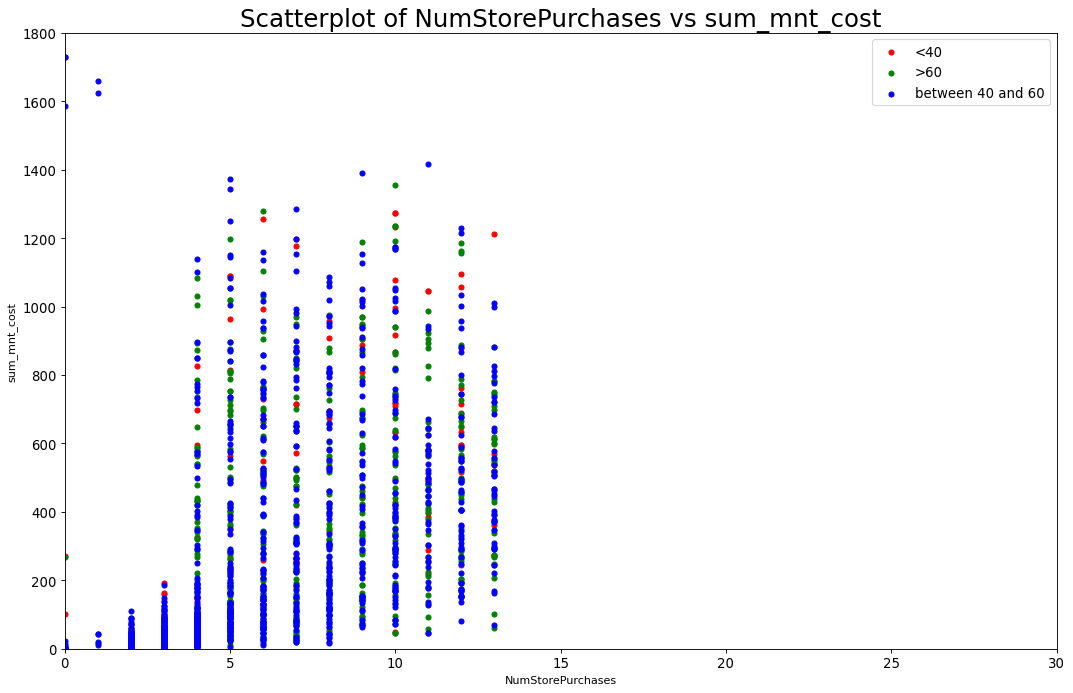

In [18]:
categories = np.unique(category_data['Age_category'])
colors = ['red', 'green', 'blue']

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('NumStorePurchases', 'sum_mnt_cost', 
                data=category_data.loc[category_data.Age_category==category, :], 
                s=20, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 30), ylim=(0, 1800),
              xlabel='NumStorePurchases', ylabel='sum_mnt_cost')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of NumStorePurchases vs sum_mnt_cost", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  
#if customers make more than 3 purchases in the store, their average spending increases
#the division into clusters is not obvious, age has little effect on anything, but it can be divided by price and frequency of purchases
#of buyers

In [19]:
first_store_category = customers_data[customers_data['NumStorePurchases'] < 4]
second_store_category =customers_data.loc[((customers_data['NumStorePurchases'] >=4) & (customers_data['NumStorePurchases'] <= 8))]
third_store_category = customers_data[customers_data['NumStorePurchases'] > 8]

In [20]:
first_store_category['store_category'] = '<4'
second_store_category['store_category'] = 'between 4 and 8'
third_store_category['store_category'] = '>8'

new_data = pd.concat([first_store_category,second_store_category])
store_data = pd.concat([new_data,third_store_category])
store_data

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4573/364041649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_store_category['store_category'] = '<4'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4573/364041649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_store_category['store_category'] = 'between 4 and 8'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4573/364041649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Reg_year,Age,sum_mnt_cost,store_category
1,38,1,6,2,1,1,2,0,2014,69,10,<4
8,19,0,24,3,3,3,2,1,2013,49,30,<4
9,68,0,6,1,1,1,0,0,2014,73,8,<4
10,11,5,6,0,2,1,2,0,2013,40,13,<4
11,59,16,11,11,1,2,3,0,2012,47,39,<4
...,...,...,...,...,...,...,...,...,...,...,...,...
2220,81,31,88,11,48,3,10,0,2013,44,178,>8
2221,12,26,538,69,13,3,11,1,2013,41,646,>8
2231,71,10,143,13,10,9,12,0,2012,53,176,>8
2237,91,48,217,32,12,2,13,0,2014,42,309,>8


In [21]:
store_data.pop('NumStorePurchases')
store_data.pop('Response')
store_data.pop('Reg_year')
store_data.pop('Age')

1       69
8       49
9       73
10      40
11      47
        ..
2220    44
2221    41
2231    53
2237    42
2238    67
Name: Age, Length: 2240, dtype: int64

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x640 with 0 Axes>

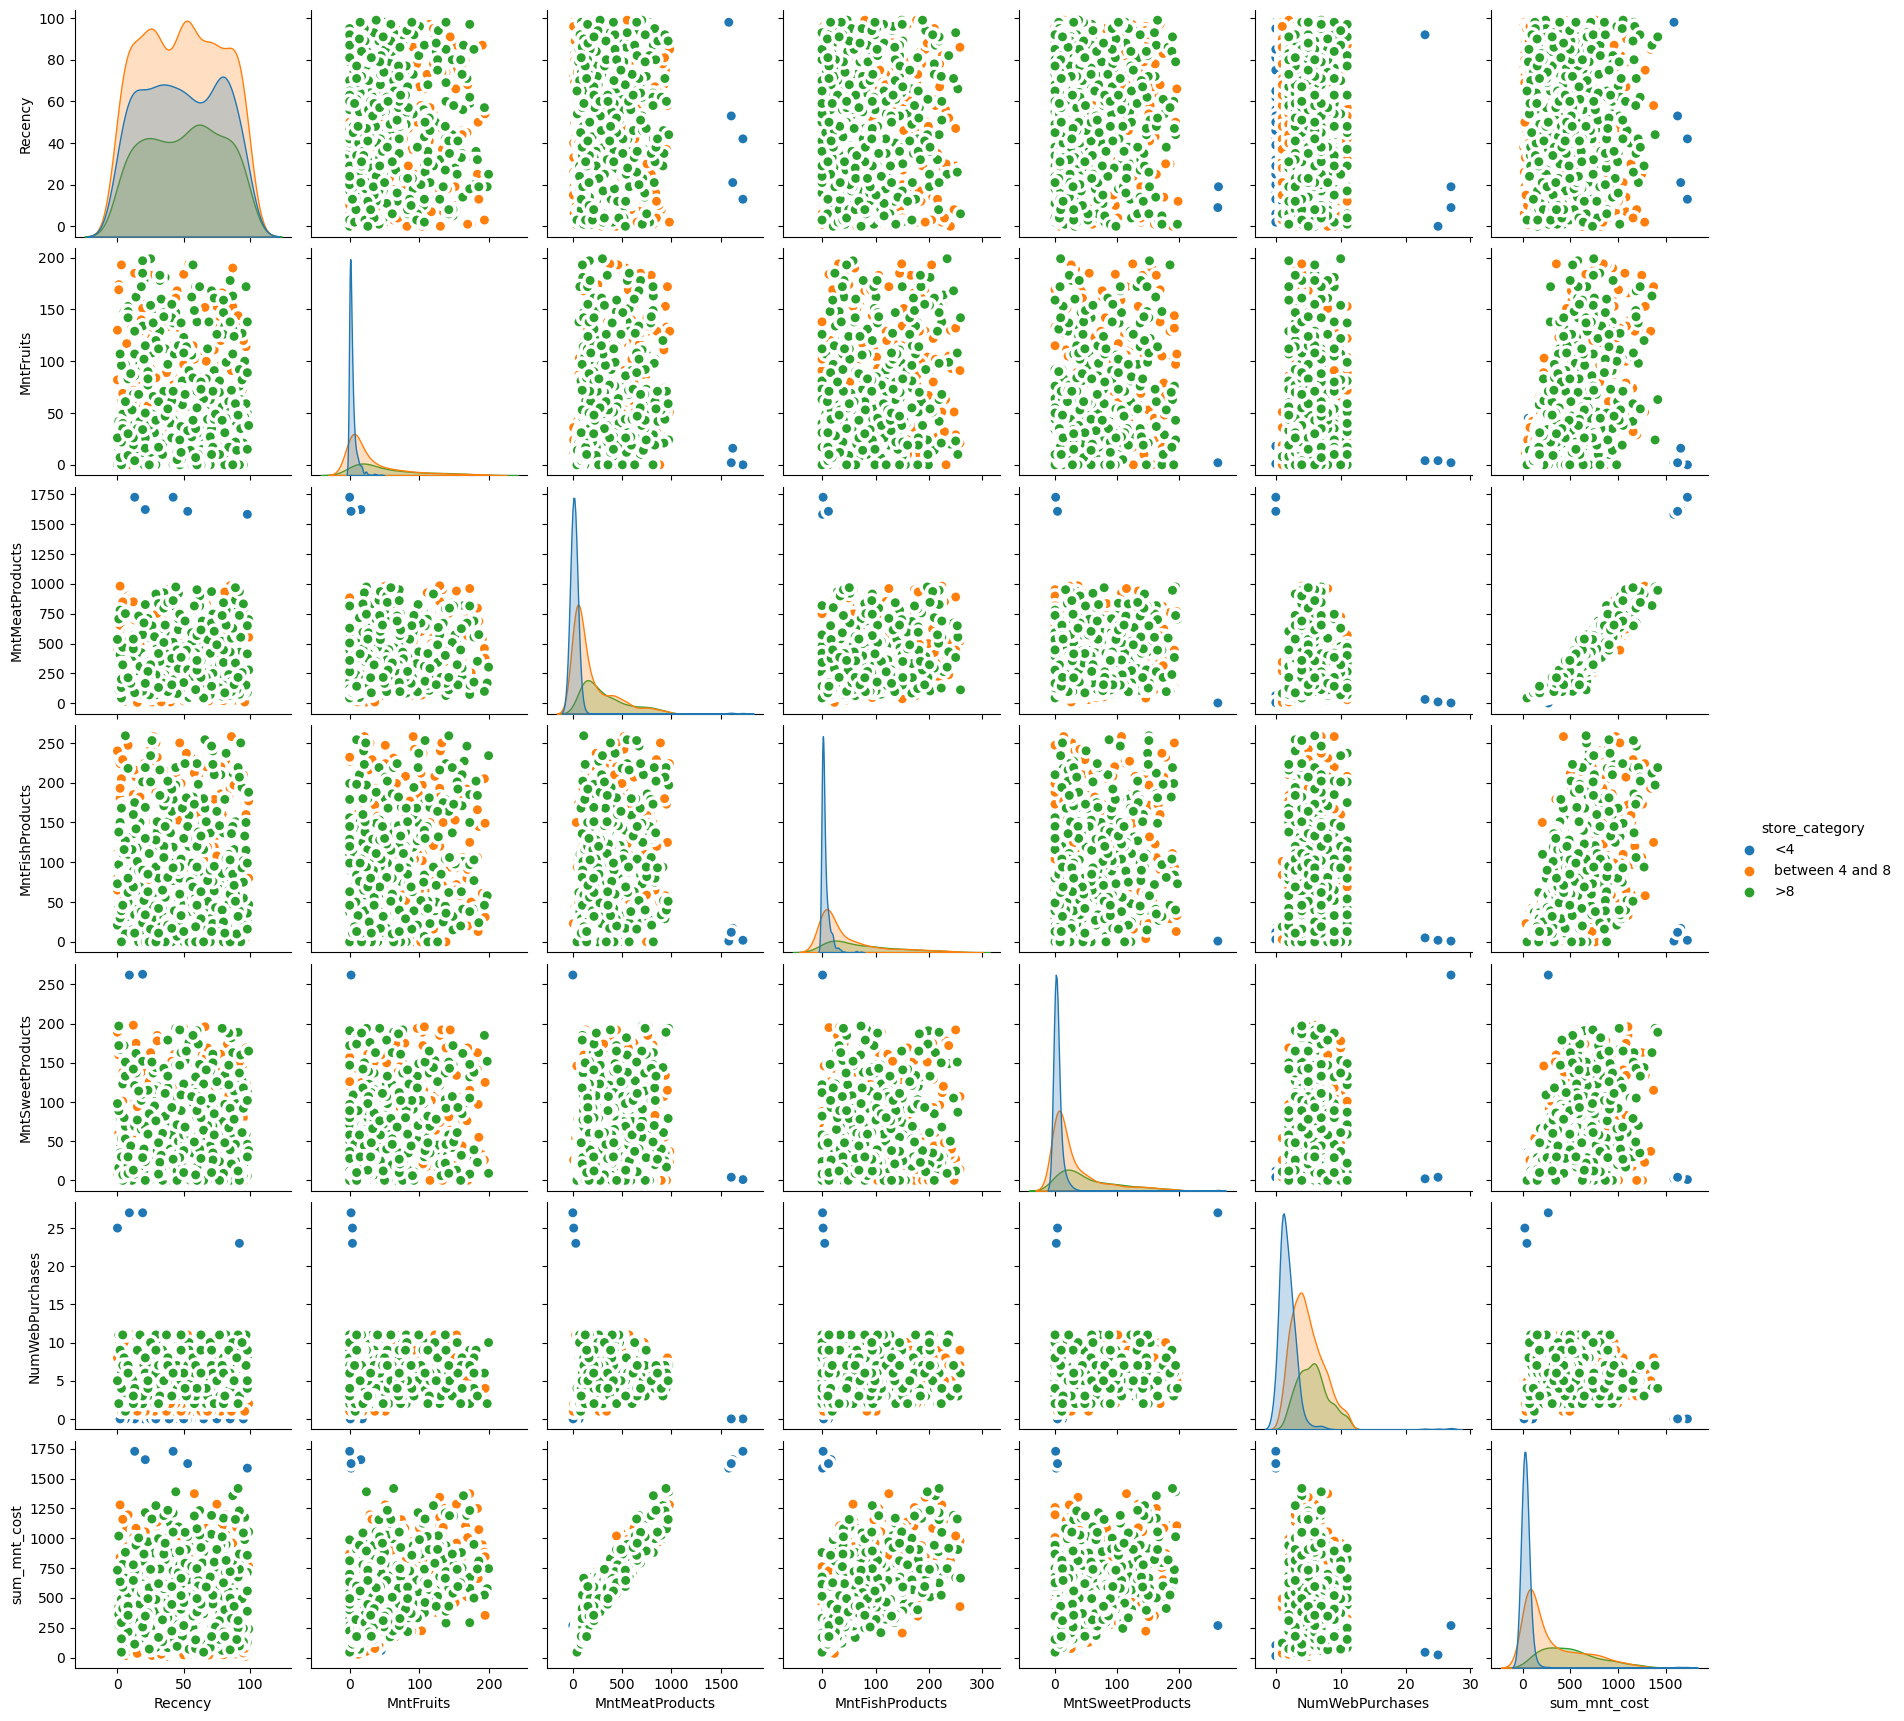

In [23]:
import seaborn as sns
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(store_data, kind="scatter", hue="store_category", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()
#it is noticeable that customers who rarely go to the store are different from the rest
#these customers prefer to spend more money on meat

  ### Trying to separate buyers according to their activity.

{'whiskers': [<matplotlib.lines.Line2D at 0x1744f5e90>,
 'caps': [<matplotlib.lines.Line2D at 0x1744f7250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1742e85d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1744d8210>],
 'fliers': [<matplotlib.lines.Line2D at 0x174504a50>],
 'means': []}

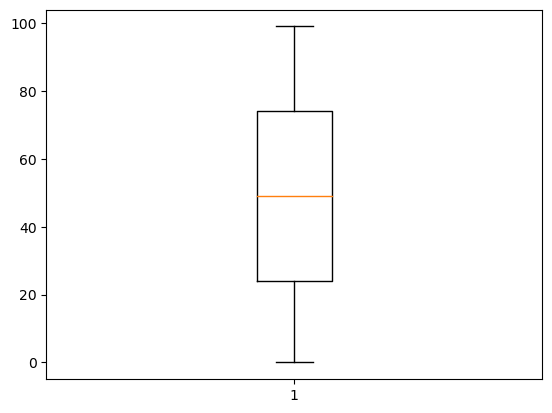

In [24]:
plt.boxplot(customers_data['Recency'])

In [25]:
first_recency_category = customers_data[customers_data['Recency'] < 20]
second_recency_category =customers_data.loc[((customers_data['Recency'] >=20) & (customers_data['Recency'] <= 60))]
third_recency_category = customers_data[customers_data['Recency'] > 60]

first_recency_category['recency_category'] = '<20'
second_recency_category['recency_category'] = 'between 20 and 60'
third_recency_category['recency_category'] = '>60'

new_data = pd.concat([first_recency_category,second_recency_category])
recency_data = pd.concat([new_data,third_recency_category])
recency_data

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4573/1303625001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_recency_category['recency_category'] = '<20'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4573/1303625001.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_recency_category['recency_category'] = 'between 20 and 60'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4573/1303625001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Reg_year,Age,sum_mnt_cost,recency_category
5,16,42,98,0,42,6,10,0,2013,56,182,<20
8,19,0,24,3,3,3,2,1,2013,49,30,<20
10,11,5,6,0,2,1,2,0,2013,40,13,<20
23,0,0,102,21,32,6,9,0,2014,69,155,<20
26,4,4,30,3,6,5,4,0,2013,47,43,<20
...,...,...,...,...,...,...,...,...,...,...,...,...
2226,87,5,106,15,17,11,6,0,2013,44,143,>60
2230,82,3,26,7,1,3,2,0,2013,39,37,>60
2231,71,10,143,13,10,9,12,0,2012,53,176,>60
2234,81,3,7,6,2,1,2,0,2013,49,18,>60


In [26]:
recency_data.pop('Recency')
recency_data.pop('Response')
recency_data.pop('Reg_year')
recency_data.pop('Age')

5       56
8       49
10      40
23      69
26      47
        ..
2226    44
2230    39
2231    53
2234    49
2237    42
Name: Age, Length: 2240, dtype: int64

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x640 with 0 Axes>

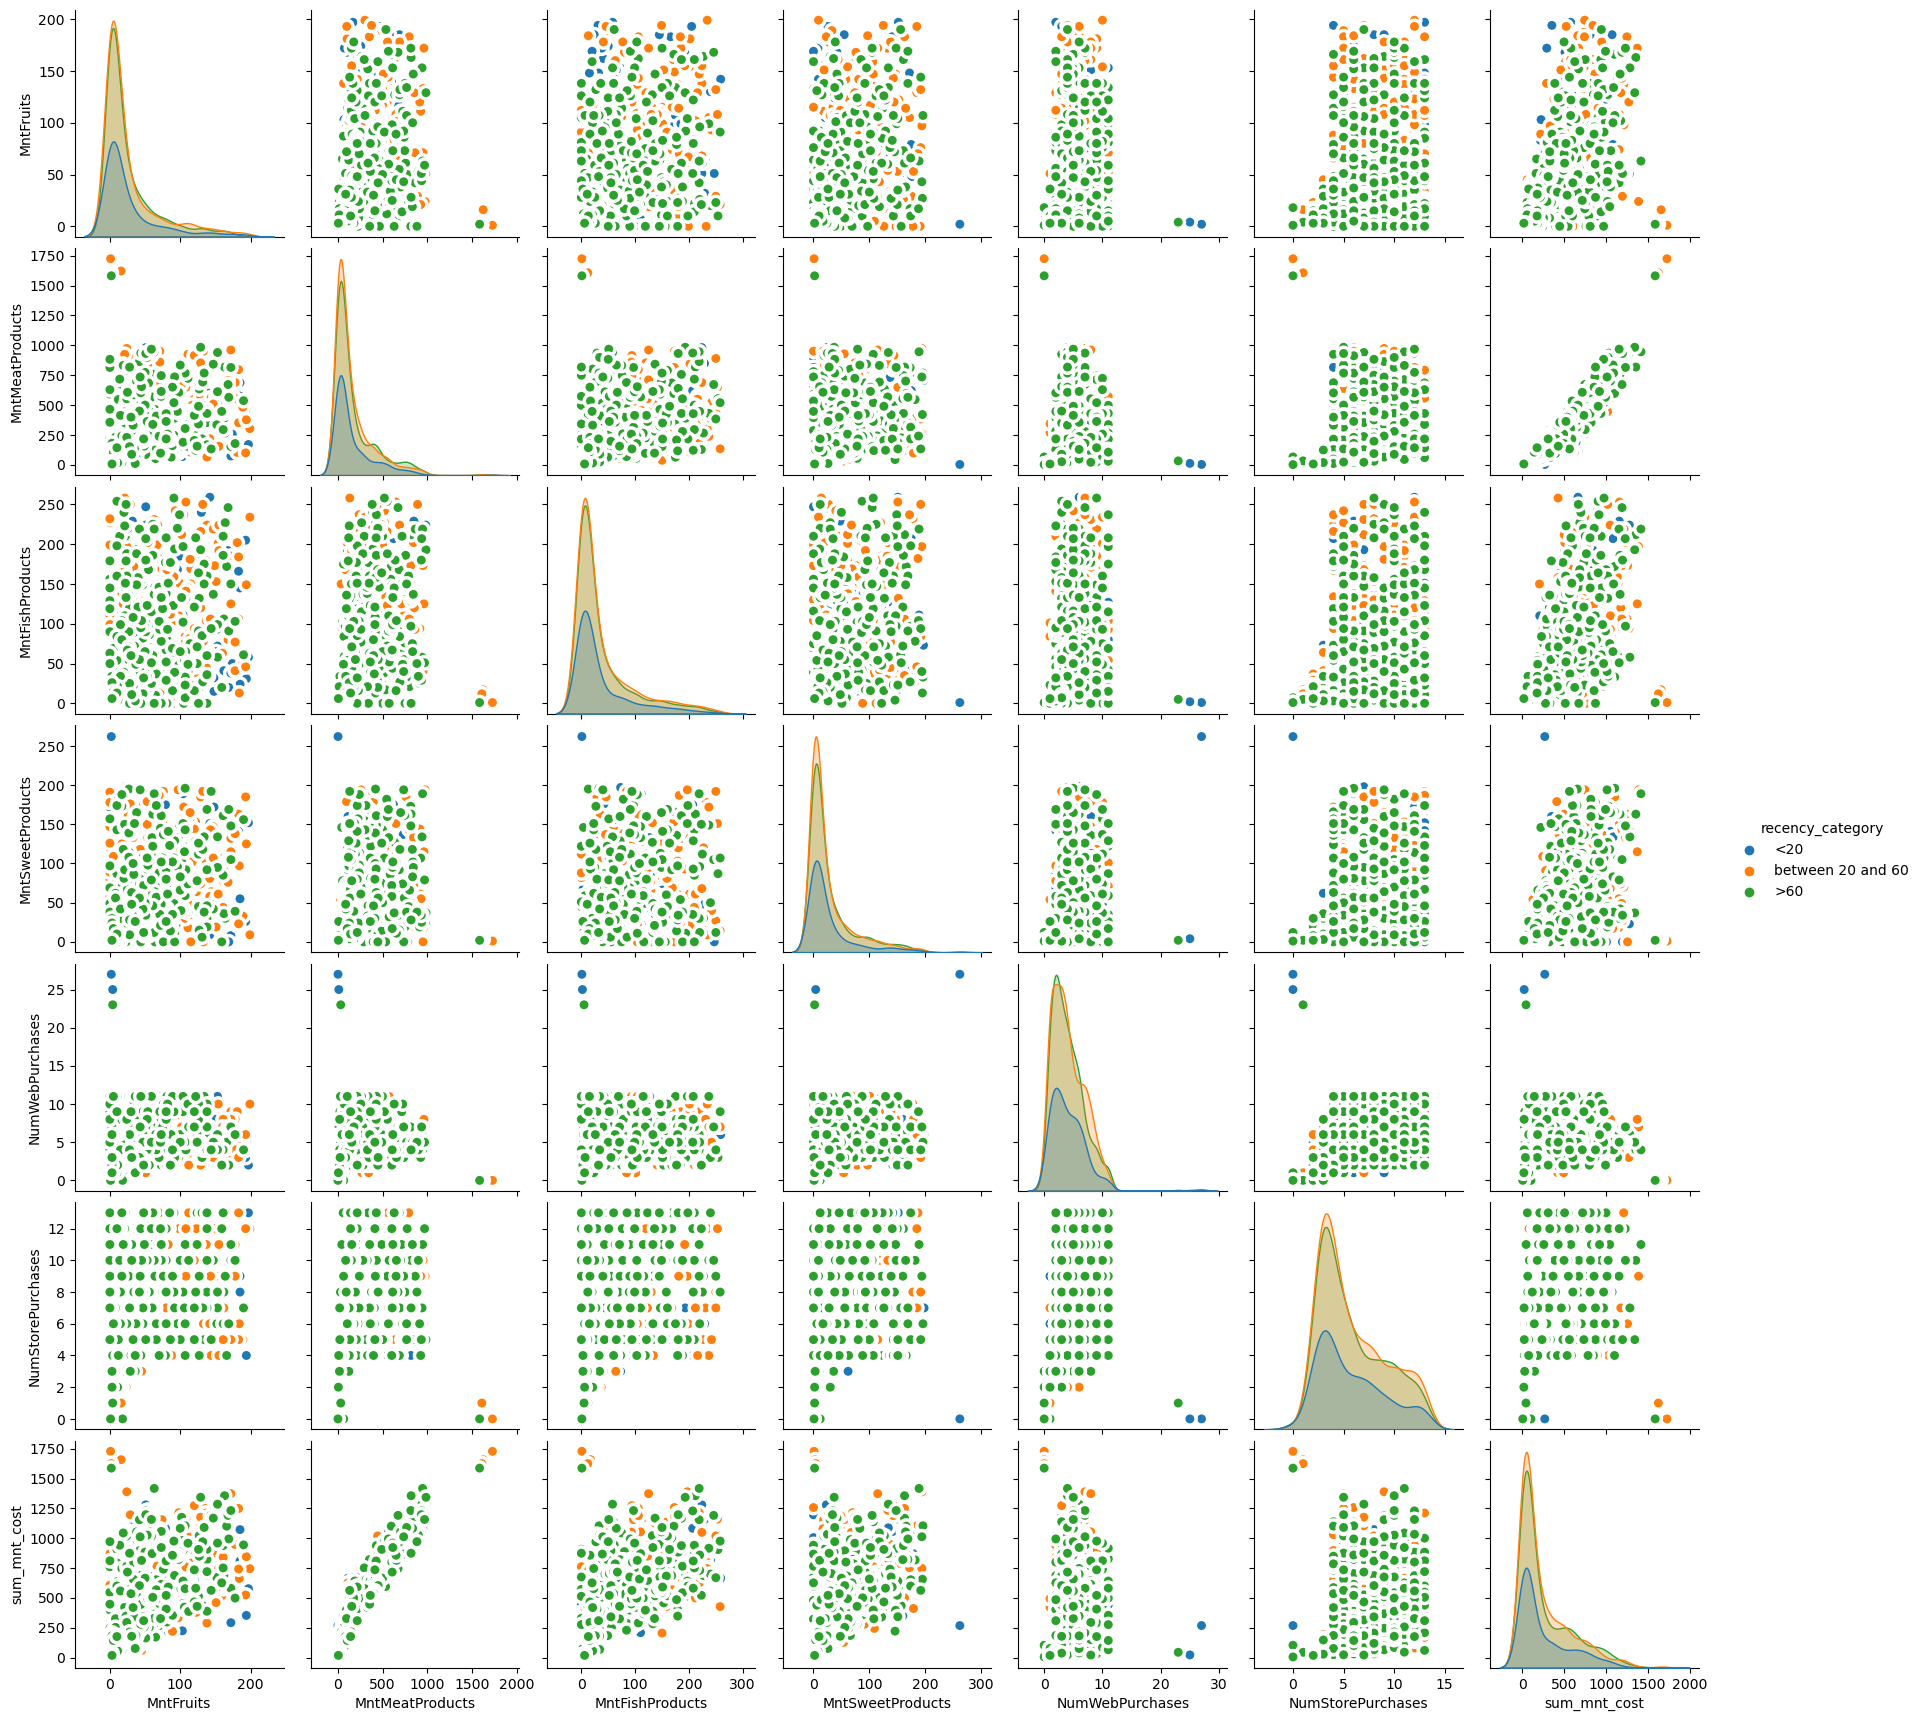

In [27]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(recency_data, kind="scatter", hue="recency_category", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()
#weak patterns

Text(0, 0.5, 'Amount of people')

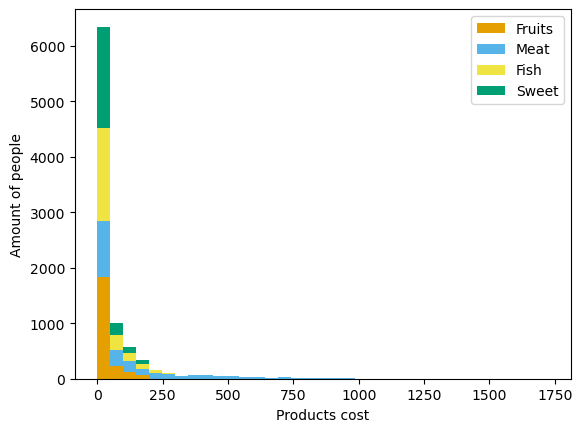

In [28]:
x1 = list(customers_data['MntFruits'])
x2 = list(customers_data['MntMeatProducts'])
x3 = list(customers_data['MntFishProducts'])
x4 = list(customers_data['MntSweetProducts'])

colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
names = ['Fruits', 'Meat', 'Fish', 'Sweet']

plt.hist([x1, x2, x3, x4], bins = int(1750/50
                                     ), stacked=True,
        color = colors, label=names)

plt.legend()
plt.xlabel('Products cost')
plt.ylabel('Amount of people')
#there is a small category of customers who buy meat more often, the majority of people prefer to buy rarely
# or choose inexpensive products

### The number of clusters is very ambiguously determined. It looks very much like cluster 2, based on preferences in purchasing certain products.

In [29]:
customers_data = pd.read_csv('14.4 marketing campaign.csv')
customers_data.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [30]:
#columns that don't affect anything
customers_data.pop('ID')
customers_data.pop('Dt_Customer')
customers_data.pop('Response')

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [31]:
customers_data['Age']= 2023 - customers_data['Year_Birth']

In [32]:
customers_data_ = customers_data[customers_data['Age']<100]

In [33]:
customers_data_

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Age
0,1957,58,88,546,172,88,8,4,66
1,1954,38,1,6,2,1,1,2,69
2,1965,26,49,127,111,21,8,10,58
3,1984,26,4,20,10,3,2,4,39
4,1981,94,43,118,46,27,5,6,42
...,...,...,...,...,...,...,...,...,...
2235,1967,46,43,182,42,118,9,4,56
2236,1946,56,0,30,0,0,8,5,77
2237,1981,91,48,217,32,12,2,13,42
2238,1956,8,30,214,80,30,6,10,67


{'whiskers': [<matplotlib.lines.Line2D at 0x1740e5250>,
 'caps': [<matplotlib.lines.Line2D at 0x1740d7e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1740ece50>],
 'medians': [<matplotlib.lines.Line2D at 0x1740d6190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1740d7510>],
 'means': []}

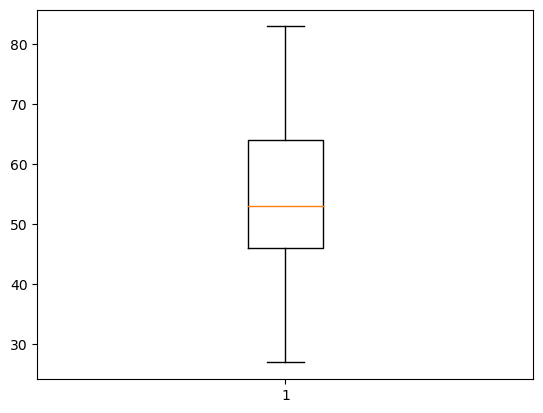

In [34]:
plt.boxplot(customers_data_['Age'])

In [35]:
customers_data_.pop('Year_Birth')

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2237, dtype: int64

In [49]:
customers_data_

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Age
0,1957,58,88,546,172,88,8,4,66
1,1954,38,1,6,2,1,1,2,69
2,1965,26,49,127,111,21,8,10,58
3,1984,26,4,20,10,3,2,4,39
4,1981,94,43,118,46,27,5,6,42
...,...,...,...,...,...,...,...,...,...
2235,1967,46,43,182,42,118,9,4,56
2236,1946,56,0,30,0,0,8,5,77
2237,1981,91,48,217,32,12,2,13,42
2238,1956,8,30,214,80,30,6,10,67


## Building clustering using the k-means method


In [65]:
from sklearn.cluster import KMeans

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

<Axes: >

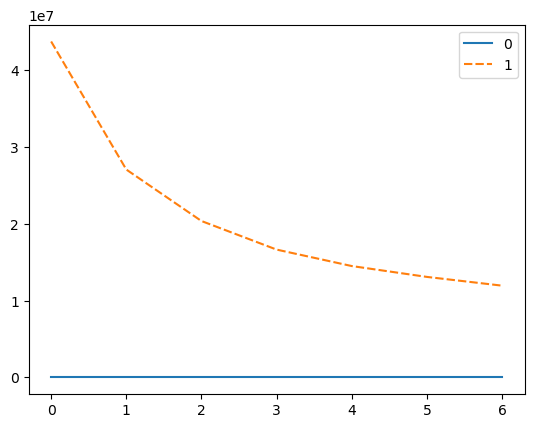

In [66]:
#the elbow method

n_clusters= list(range(2, 9))
metrics= []

for k in n_clusters:
    km = KMeans(n_clusters=k).fit(customers_data_)
    metrics.append((km.inertia_))
    
sns.lineplot((n_clusters, metrics))


In [39]:
#silhouette score
from sklearn.metrics import silhouette_score

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

<Axes: >

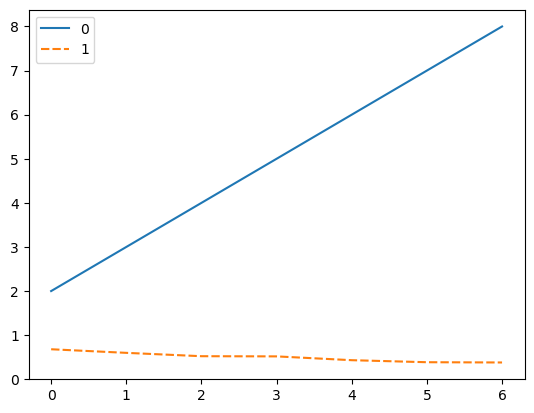

In [67]:
n_clusters= list(range(2, 9))
metrics= []

for k in n_clusters:
    km = KMeans(n_clusters=k).fit(customers_data_)
    score = silhouette_score(customers_data_, km.labels_)
    metrics.append(score)
    
sns.lineplot((n_clusters, metrics))
#the optimal number of clusters is 3

## Visualization of clustering using the t-SNE method


In [83]:
km = KMeans(n_clusters=3).fit(customers_data_)
labels = km.labels_

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [84]:
set(km.labels_)

{0, 1, 2}

In [85]:
%matplotlib inline

<Axes: xlabel='0', ylabel='1'>

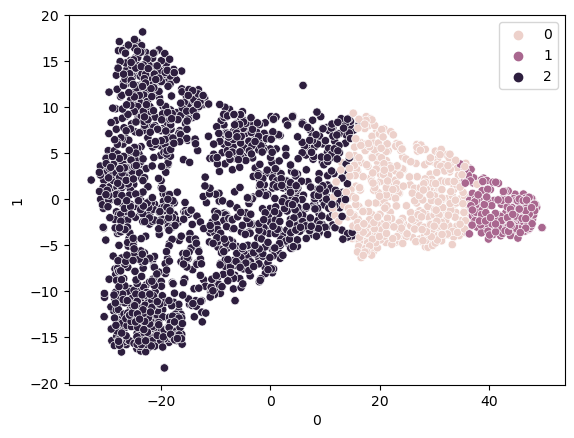

In [86]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100)
df_emb= tsne.fit_transform(customers_data_)
data= pd.DataFrame(df_emb)

sns.scatterplot(x=data[0],y=data[1], hue = labels)

## Description of cluster profiles

In [87]:
customers_data = pd.read_csv('14.4 marketing campaign.csv')
customers_data.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [88]:
customers_data.pop('ID')
customers_data.pop('Dt_Customer')
customers_data.pop('Response')

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [89]:
customers_data['Age']= 2023 - customers_data['Year_Birth']
customers_data_ = customers_data[customers_data['Age']<100]

In [90]:
customers_data_['cluster'] =km.labels_

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4573/4216756686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_data_['cluster'] =km.labels_


In [91]:
customers_data_

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Age,cluster
0,1957,58,88,546,172,88,8,4,66,1
1,1954,38,1,6,2,1,1,2,69,2
2,1965,26,49,127,111,21,8,10,58,2
3,1984,26,4,20,10,3,2,4,39,2
4,1981,94,43,118,46,27,5,6,42,2
...,...,...,...,...,...,...,...,...,...,...
2235,1967,46,43,182,42,118,9,4,56,0
2236,1946,56,0,30,0,0,8,5,77,2
2237,1981,91,48,217,32,12,2,13,42,0
2238,1956,8,30,214,80,30,6,10,67,0


In [92]:
features=['Recency', 'Age', 'MntFruits', 'MntMeatProducts'
          ,'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumStorePurchases']
data_stat = customers_data_.groupby('cluster').agg({x: ['mean', 'std'] for x in features}).T
data_stat

cluster                          0           1          2
Recency           mean   48.968815   49.695652  49.067786
                  std    29.260487   29.756441  28.770385
Age               mean   56.172557   53.748792  53.500968
                  std    12.380317   13.657200  11.123724
MntFruits         mean   60.170478   69.062802  10.025178
                  std    48.329814   50.568524  18.649563
MntMeatProducts   mean  313.550936  727.217391  46.508070
                  std   101.393612  194.886539  46.310986
MntFishProducts   mean   87.446985   98.671498  13.848935
                  std    64.147598   68.098004  24.167918
MntSweetProducts  mean   61.627859   70.975845  10.469981
                  std    47.982818   53.918443  21.393324
NumWebPurchases   mean    5.777547    4.942029   3.448031
                  std     2.496330    1.863425   2.714811
NumStorePurchases mean    8.629938    8.154589   4.598451
                  std     2.873778    2.865135   2.634034

In [93]:
cluster_labels=[0, 1, 2]

In [94]:
functions=['mean', 'std']
stat = np.array([[customers_data_[feature].apply(f) for f in functions]for  feature in features]).flatten()

data_stat['Global']=stat
data_stat

cluster                          0           1          2      Global
Recency           mean   48.968815   49.695652  49.067786   49.104604
                  std    29.260487   29.756441  28.770385   28.956073
Age               mean   56.172557   53.748792  53.500968   54.098346
                  std    12.380317   13.657200  11.123724   11.701917
MntFruits         mean   60.170478   69.062802  10.025178   26.270451
                  std    48.329814   50.568524  18.649563   39.715972
MntMeatProducts   mean  313.550936  727.217391  46.508070  166.916853
                  std   101.393612  194.886539  46.310986  225.661158
MntFishProducts   mean   87.446985   98.671498  13.848935   37.523022
                  std    64.147598   68.098004  24.167918   54.639909
MntSweetProducts  mean   61.627859   70.975845  10.469981   27.068842
                  std    47.982818   53.918443  21.393324   41.293949
NumWebPurchases   mean    5.777547    4.942029   3.448031    4.087170
                  std     2.496330    1.863425   2.714811    2.779461
NumStorePurchases mean    8.629938    8.154589   4.598451    5.794367
                  std     2.873778    2.865135   2.634034    3.250940

<Axes: xlabel='cluster', ylabel='None-None'>

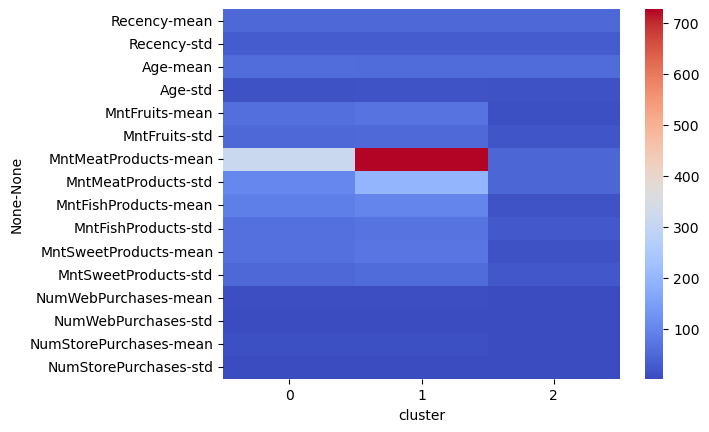

In [95]:
sns.heatmap(data_stat[cluster_labels], cmap='coolwarm')

### 1. Buyers of the 1st cluster differ in that their average price for the purchase of meat is higher than that of buyers of the 3rd cluster, but lower than that of buyers of the 2nd cluster. More information about these customers is needed.
### 2. Buyers of the 2nd cluster differ in that their average price for buying meat is the highest. Perhaps these buyers are from their large families, or they like to buy rarely, but in large quantities.
### 3.Buyers of the third cluster spend significantly less than other buyers.
### Conclusion: buyers of cluster 3 may be interested in advantageous offers related to the opportunity to buy several products for less money. Buyers of cluster 2 will be interested in new arrivals of all categories of goods, as they spend the most on them. 